# more extraction - low priority

In [2]:
# write a script to extract the motion energy of the pixels inside the nose-jaw-eye delineated rectangle - to include whisker pad but exclude moving lickport

# regression

In [1]:
#Import necessary libraries - should work mostly from BCI_analysis + matplotlib + numpy
import BCI_analysis
from BCI_analysis.pipeline import pipeline_regression
import importlib
importlib.reload(pipeline_regression)
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally


In [2]:
#load multi-session mat files

#multisession_mat_file = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_new_old2.mat")
multisession_mat_file = os.path.abspath("/home/jupyter/temp/combined_new_old2.mat")
#multisession_mat_file_behavior = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_behavior.mat")
multisession_mat_file_behavior = os.path.abspath("/home/jupyter/temp/combined_behavior.mat")

# print('loading multi-session imaging data...')
# multi_session_data = BCI_analysis.io_matlab.read_multisession_mat_2022(multisession_mat_file)
print('loading multi-session behavior data...')
multi_session_behavior_data = BCI_analysis.io_matlab.read_multisession_behavior_mat(multisession_mat_file_behavior)



loading multi-session behavior data...


In [3]:
# # define base directories, if necessary
# # define subject/FOV/session/
# importlib.reload(BCI_analysis.pipeline_align)
# multisession_mat_file = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/multi_session_mat/combined_new_old2.mat")
# dlc_base_dir = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
# bpod_path = os.path.abspath("/home/jupyter/bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
# suite2p_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
# sessionwise_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba/")
# aligned_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/data_aligned/")
# plt_save_path = os.path.abspath("/home/jupyter/Plots/")

# mouse = "BCI_26"
# FOV = "FOV_04"
# camera = "side"
# session = "041022"


# mouse = "BCI_29"
# FOV = "FOV_02"
# camera = "side"
# session = "042822"

# # match calcium imaging frames with DLC frames, extract all data in a nice structure
# # it doesn't have to have the actual calcium traces, the frame indices are enough, since we'll select the calcium traces in a next step, since probably this cell will be the slowest
# # should have the option for averaging/std calculation on variable windows, then downsampling
# # should have the option for excluding post-reward activity
# dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, 
#                                                             dlc_base_dir, 
#                                                             bpod_path, 
#                                                             sessionwise_data_path, 
#                                                             aligned_data_path, 
#                                                             mouse=mouse, 
#                                                             FOV=FOV, 
#                                                             camera=camera, 
#                                                             session=session, 
#                                                             sampling='down', 
#                                                             functions = ['diff','diff_signed','mean'],
#                                                             convolve_tau = 0,
#                                                             plot = False,
#                                                             overwrite=True)
# print(dict_aligned.keys())
# DLC_aligned = pd.DataFrame.from_dict(dict_aligned['DLC_aligned'])
# F = np.concatenate(dict_aligned['F_aligned'], axis=1)

In [4]:
multi_session_behavior_data['mouse']

['BCI33',
 'BCI33',
 'BCI33',
 'BCI33',
 'BCI33',
 'BCI34',
 'BCI34',
 'BCI34',
 'BCI34',
 None,
 'BCI35',
 'BCI35',
 'BCI35',
 'BCI35',
 'BCI37',
 'BCI37',
 'BCI37',
 'BCI37']

In [5]:
len(pd.DataFrame())

0

In [8]:
# using data from .mat file 
from oasis.functions import deconvolve
importlib.reload(BCI_analysis)
dlc_base_dir = os.path.abspath("/home/jupyter/bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
bpod_path = os.path.abspath("/home/jupyter/bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
suite2p_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
sessionwise_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba/")
aligned_data_path = os.path.abspath("/home/jupyter/bucket/Data/Calcium_imaging/data_aligned/")
plt_save_path = os.path.abspath("/home/jupyter/Plots/")

multi_session_dict = {'mouse':[],
                     'session':[],
                      'mat_idx':[],
                     'cn':[],
                     'DLC_aligned':[],
                     'F':[],
                     'trial_end_frames':[]}
needed_subject = 'BCI34'
do_deconvolve = False
for mat_session_index in range(len(multi_session_behavior_data['session'])):
    # if multi_session_behavior_data['mouse'][mat_session_index] != needed_subject:
    #     continue
    try:
        mouse = multi_session_behavior_data['mouse'][mat_session_index][:3]+'_'+multi_session_behavior_data['mouse'][mat_session_index][3:]
        session = multi_session_behavior_data['session'][mat_session_index]
        camera = "side"
        data = {'F':multi_session_behavior_data['df_closedLoop'][mat_session_index].T,
               'trial_start':multi_session_behavior_data['trial_start'][mat_session_index],
               'cn':int(multi_session_behavior_data['conditioned_neuron'][mat_session_index].tolist())-1,
               'si':multi_session_behavior_data['dt_si'][mat_session_index].tolist()}

        if do_deconvolve:
            spikes_matrix= []
            for F_trace in data['F']:
                c, s, b_, g_, lam = deconvolve(F_trace, penalty=1) 
                spikes_matrix.append(s)
            data['F'] = np.asarray(spikes_matrix)


        dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, 
                                                                    dlc_base_dir, 
                                                                    bpod_path, 
                                                                    sessionwise_data_path, 
                                                                    aligned_data_path, 
                                                                    mouse=mouse, 
                                                                    FOV=None, 
                                                                    camera=camera, 
                                                                    session=session, 
                                                                    sampling='down', 
                                                                    functions = ['diff','diff_signed','mean'],
                                                                    convolve_tau = .7,
                                                                    plot = False,
                                                                    overwrite=False,
                                                                    use_provided_data=True,
                                                                    source_data = data)
        DLC_aligned = pd.DataFrame.from_dict(dict_aligned['DLC_aligned'])
        F = np.concatenate(dict_aligned['F_aligned'], axis=1)

        multi_session_dict['mouse'].append(multi_session_behavior_data['mouse'][mat_session_index])
        multi_session_dict['session'].append(multi_session_behavior_data['session'][mat_session_index])
        multi_session_dict['cn'].append(int(multi_session_behavior_data['conditioned_neuron'][mat_session_index].tolist())-1)
        multi_session_dict['mat_idx'].append(mat_session_index)
        multi_session_dict['DLC_aligned'].append(DLC_aligned)
        multi_session_dict['F'].append(F)
        multi_session_dict['trial_end_frames'].append(dict_aligned['trial_start_indices'])
        #break
        
        
    except:
        print('no luck with session {}'.format(mat_session_index))

print(dict_aligned.keys())



File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/062722-dict_aligned-downsampled.npy
Aligned data not found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/062822-dict_aligned-downsampled.npy, saving
bpod trials: 92
imaging trials: 39
Since max_frames is all, this function will return a list of F trialwise as all trials have different lengths
39
(168, 622)
no luck with session 1
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/062922-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/063022-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_33/070122-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_34/062722-dict_aligned-downsampled.npy
File found at /home/jupyter/bucket/Data/Calcium_imaging/data_aligned/BCI_34/062822-dict_aligned-downsampled.npy
File found at 

In [29]:
#create multi-session dlc-aligned
import scipy
zscore_fluorescence = False
session_frame_nums = []
for i,(DLC_aligned_now,F_now) in enumerate(zip(multi_session_dict['DLC_aligned'],multi_session_dict['F'])):
    session_frame_nums.append(F_now.shape[1])
    if zscore_fluorescence:
        F_now = scipy.stats.zscore(F_now,axis = 1)
    for k in DLC_aligned_now.keys():
        if 'mean' in k:# subtract mean from the raw position from day to day
            DLC_aligned_now[k] = DLC_aligned_now[k] - np.nanmean(DLC_aligned_now[k])
    if i == 0:
        DLC_aligned = DLC_aligned_now
        F = F_now
    else:
        DLC_aligned = pd.concat([DLC_aligned, DLC_aligned_now], ignore_index=True)
        F = np.concatenate([F,F_now],1)
    print(DLC_aligned.shape)
    #break


(25197, 108)
(47773, 108)
(70180, 108)
(92363, 108)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 622 and the array at index 1 has size 364

In [227]:
# # moving average of fluorescence
# F_roll = []
# for f in F:
#     F_roll.append(BCI_analysis.plot_utils.rollingfun(f,10,'mean'))
# F_roll = np.asarray(F_roll)
# F = F_roll

(8000.0, 10000.0)

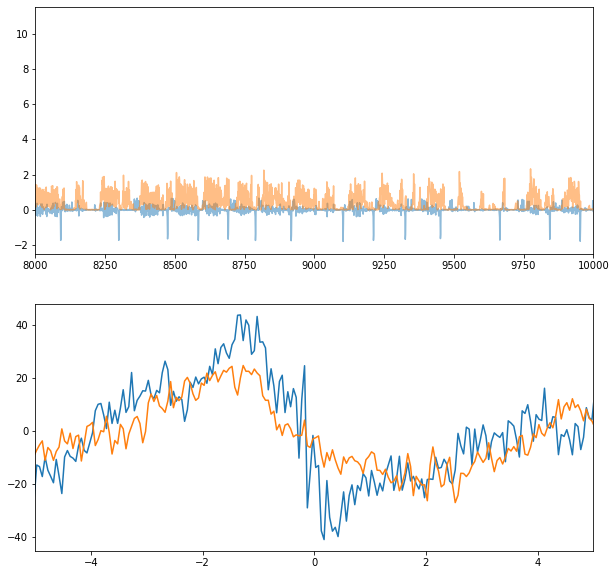

In [163]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
lp = multi_session_dict['DLC_aligned'][0]['Lickport','diff_signed','x'].values.copy()
#lp[lp<0] = 0
jaw = multi_session_dict['DLC_aligned'][0]['Jaw','diff','y']

ax.plot(lp,alpha = .5)
ax.plot(jaw,alpha = .5)
for s,e in zip([0,10000],[5000,15000]):

    
    ax.set_xlim([s,e])
    cc = scipy.signal.correlate(lp[s:e], jaw[s:e], mode='full', method='auto')

    ax2.plot((np.arange(len(cc))-len(cc)/2)/20,cc)
    ax2.set_xlim([-5,5])
ax.set_xlim([8000,10000])

In [7]:
# to do 
# add velocity, convolve with calcium kinetics
# change subject to BCI29 - session with nice learning

import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


In [8]:
for k in DLC_aligned.keys(): # remove eye and likelihood
    if 'likelihood'in k or 'eye' in k[0].lower() or 'pole' in k[0].lower():
        DLC_aligned.pop(k)
for k in DLC_aligned.keys(): # remove lickport
    if 'lickport' in k[0].lower() or 'pole' in k[0].lower():
        DLC_aligned.pop(k)
# for k in DLC_aligned.keys(): # remove everything but lickport
#     if ('lickport' not in k[0].lower() and 'pole' not in k[0].lower()) or ('lickport' in k[0].lower() and 'y' == k[2]):
#         DLC_aligned.pop(k)
for k in DLC_aligned.keys(): # normalize data
    DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].mean())/DLC_aligned[k].std()
    #DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].quantile(.05))/(DLC_aligned[k].quantile(.95)-DLC_aligned[k].quantile(.05))

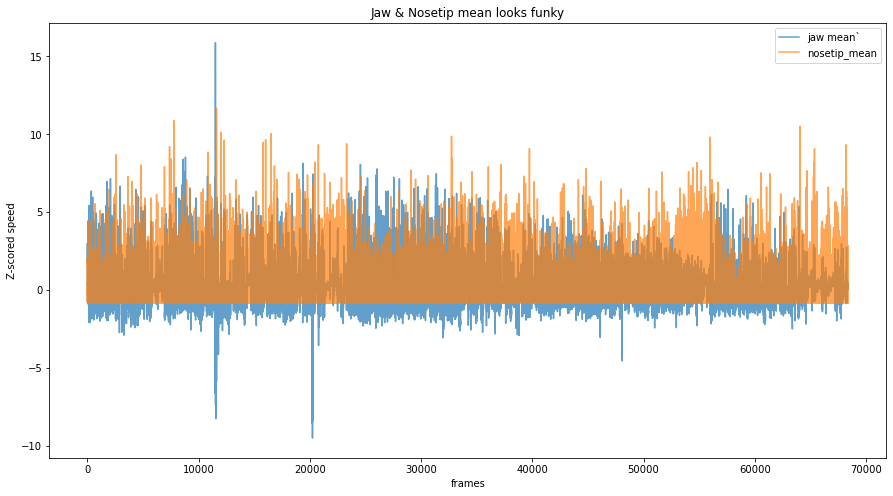

In [165]:
fig = plt.figure(figsize = [15,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(DLC_aligned["Jaw"]['mean']['x'], alpha = .7,label = 'jaw mean`')
ax1.plot(DLC_aligned["NoseTip"]['diff']['x'], alpha = .7,label = 'nosetip_mean')
ax1.set_title('Jaw & Nosetip mean looks funky')
ax1.set_xlabel('frames')
ax1.set_ylabel('Z-scored speed')
#ax1.set_xlim([0,1000])
ax1.legend()

In [9]:
#create offsets - 1 second back and forward
offsets = np.arange(-20,25,5)
cols_new = []
for col in DLC_aligned.columns:
    for offset in offsets:
        cols_new.append((col[0],offset,col[1],col[2]))
df2 = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)

for k in df2.keys():
    df2[k] = pd.Series(np.roll(DLC_aligned[k[0],k[2],k[3]],k[1]))
DLC_aligned = df2        

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


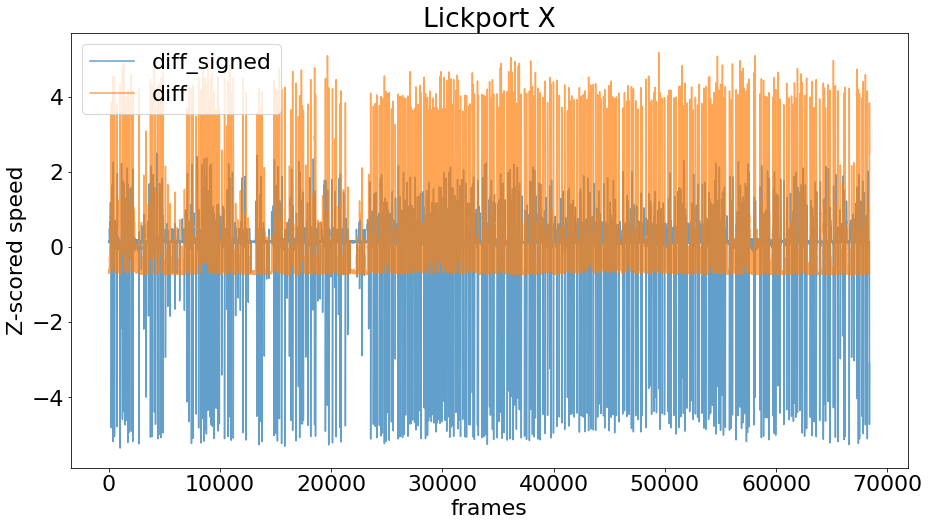

In [41]:
fig = plt.figure(figsize = [15,8])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(DLC_aligned["Lickport"]['diff_signed']['x'], alpha = .7,label = 'diff_signed')
ax1.plot(DLC_aligned["Lickport"]['diff']['x'], alpha = .7,label = 'diff')
ax1.set_title('Lickport X')
ax1.set_xlabel('frames')
ax1.set_ylabel('Z-scored speed')
#ax1.set_xlim([0,1000])
ax1.legend()

In [10]:
scores, beta, intercept = pipeline_regression.linear_regression(F, DLC_aligned)


Calculating regression fit for 364 neurons, May take time


100%|██████████| 364/364 [07:21<00:00,  1.21s/it]


In [11]:
np.argsort(scores)[::-1][:20]

array([  8,  58, 135,   2,  84, 122, 115, 101, 198,  21, 208,  50, 118,
        66,  61, 127, 336, 287,  57, 234])

Text(0.0026181461467687387, 0.044879343890118495, 'neuron 101')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


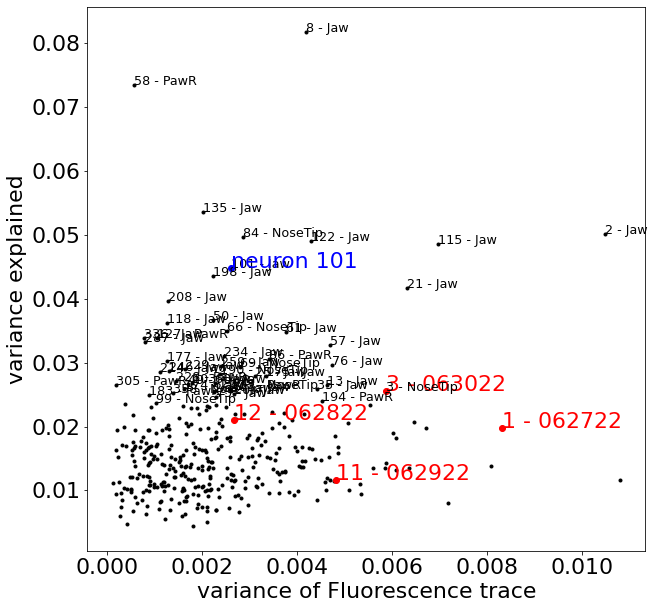

In [12]:
fig = plt.figure(figsize = [10,10])
ax=fig.add_subplot(1,1,1)
ax.plot(np.var(F,1),scores,'k.')
for cn,session in zip(multi_session_dict['cn'],multi_session_dict['session']):
    ax.plot(np.var(F,1)[cn],scores[cn],'ro')
    ax.text(np.var(F,1)[cn],scores[cn],'{} - {}'.format(cn,session),color = 'red')
ax.set_xlabel('variance of Fluorescence trace')
ax.set_ylabel('variance explained')
for cn in np.argsort(scores)[::-1][:50]:

    ax.text(np.var(F,1)[cn],scores[cn],'{} - {}'.format(cn,DLC_aligned.keys()[np.argsort(np.abs(beta[cn]))[::-1][0]][0]),color = 'black',size = 'xx-small')
cn = 101
ax.plot(np.var(F,1)[cn],scores[cn],'bo')
ax.text(np.var(F,1)[cn],scores[cn],'neuron {}'.format(cn),color = 'blue')

In [13]:
multi_session_dict['cn']

[1, 12, 11, 3]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


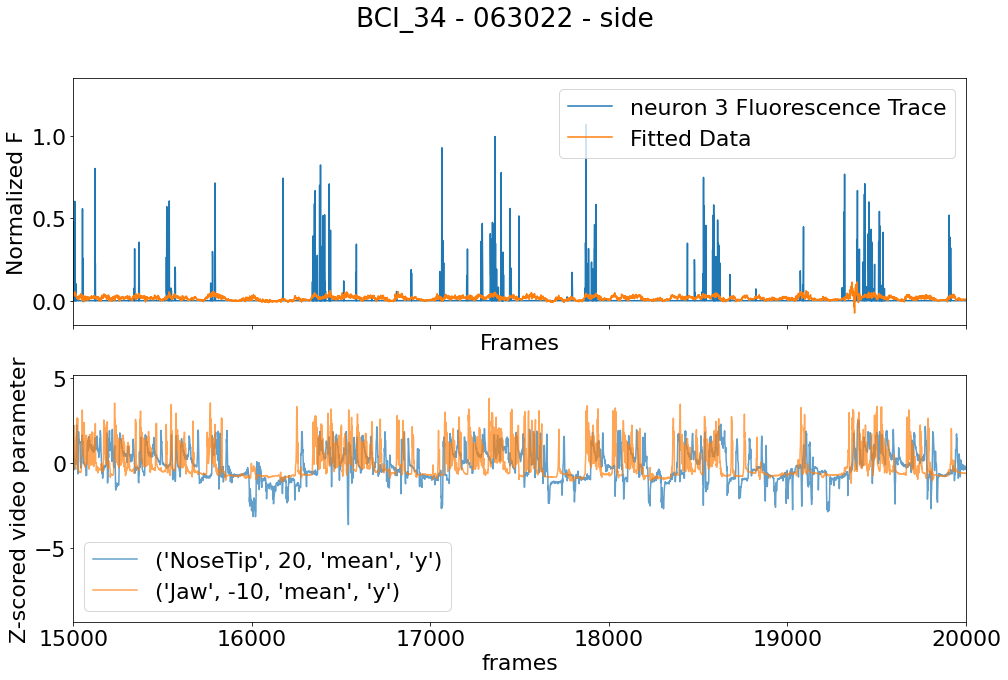

In [14]:
import matplotlib.pyplot as plt
cn = 3#dict_aligned['cn'] #54
def plot_regression(neuron=cn):
    _, axs = plt.subplots(2, 1, figsize=(16,10),sharex=True)
    plt.suptitle(f"{mouse} - {session} - {camera}")# - {FOV}")
    axs[0].plot(F[neuron, :], label=f'neuron {neuron} Fluorescence Trace')
    axs[0].plot((beta[neuron]@DLC_aligned.T) + intercept[neuron], label='Fitted Data')
    #axs[0].plot(F[neuron, :]-((beta[neuron]@DLC_aligned.T) + intercept[neuron]),'k-', label='Difference')
    # ax[0,0].set_title(f'{end-start} timepoints, score {scores[cn]:0.2f}')
    axs[0].set_xlabel("Frames")
    axs[0].set_ylabel("Normalized F")
    axs[0].legend()
    for i in np.argsort(np.abs(beta[neuron]))[::-1][:2]:
        axs[1].plot(DLC_aligned[DLC_aligned.keys()[i]], alpha = .7,label = DLC_aligned.keys()[i])
    # try:
    #     axs[1].plot(DLC_aligned["Lickport"]['diff_signed']['x'][:10000], alpha = .7,label = 'diff_signed')
    #     axs[1].plot(DLC_aligned["Lickport"]['diff']['x'][:10000], alpha = .7,label = 'diff')
    #     axs[1].set_title('Lickport X')
    # except:
    #     try:
    #         axs[1].plot(DLC_aligned["TongueTip"]['diff_signed']['y'][:10000], alpha = .7,label = 'diff_signed')
    #         axs[1].plot(DLC_aligned["TongueTip"]['diff']['y'][:10000], alpha = .7,label = 'diff')
    #         axs[1].set_title('Tongue Y')
    #     except:
    #         pass
    axs[1].set_xlabel('frames')
    axs[1].set_ylabel('Z-scored video parameter')
    axs[1].legend()
    axs[0].set_xlim([15000,20000])
    #plt.plot()
plot_regression(cn)

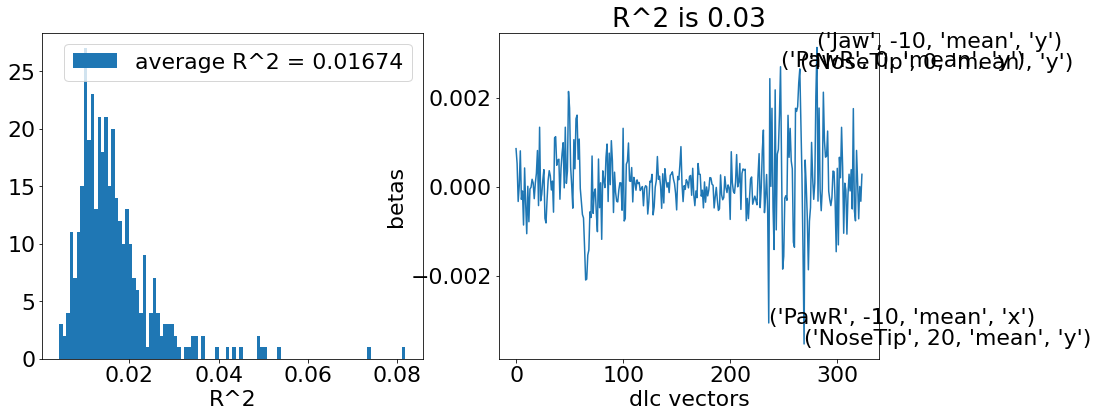

In [15]:

fig = plt.figure(figsize = [15,6])
ax_scores = fig.add_subplot(1,2,1)
ax_scores.hist(scores, bins=100, label=f'average R^2 = {np.mean(scores):0.5f}')
ax_scores.legend()
ax_scores.set_xlabel('R^2')
ax_beta_cn = fig.add_subplot(1,2,2)
ax_beta_cn.plot(beta[cn,:])
ax_beta_cn.set_xlabel('dlc vectors')
ax_beta_cn.set_ylabel('betas')
ax_beta_cn.set_title('R^2 is {}'.format(np.round(scores[cn],2)))
for i in np.argsort(np.abs(beta[cn,:]))[::-1][:5]:
    ax_beta_cn.text(i,beta[cn,i],DLC_aligned.keys()[i])
#plt.show

In [16]:
# offset in time
score_list = []
beta_list = []
offsets = np.arange(-155,155,5)
offsets = np.arange(-20,10,5)
for offset in offsets:
    scores_, beta_, intercept_ = pipeline_regression.linear_regression(np.roll(F[cn:cn+1],offset,1), DLC_aligned)
    score_list.append(scores_[0])
    beta_list.append(beta_[0])
#plt.plot(offsets/20,score_list)

Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


Text(0.5, 1.0, 'betas at optimal offset')

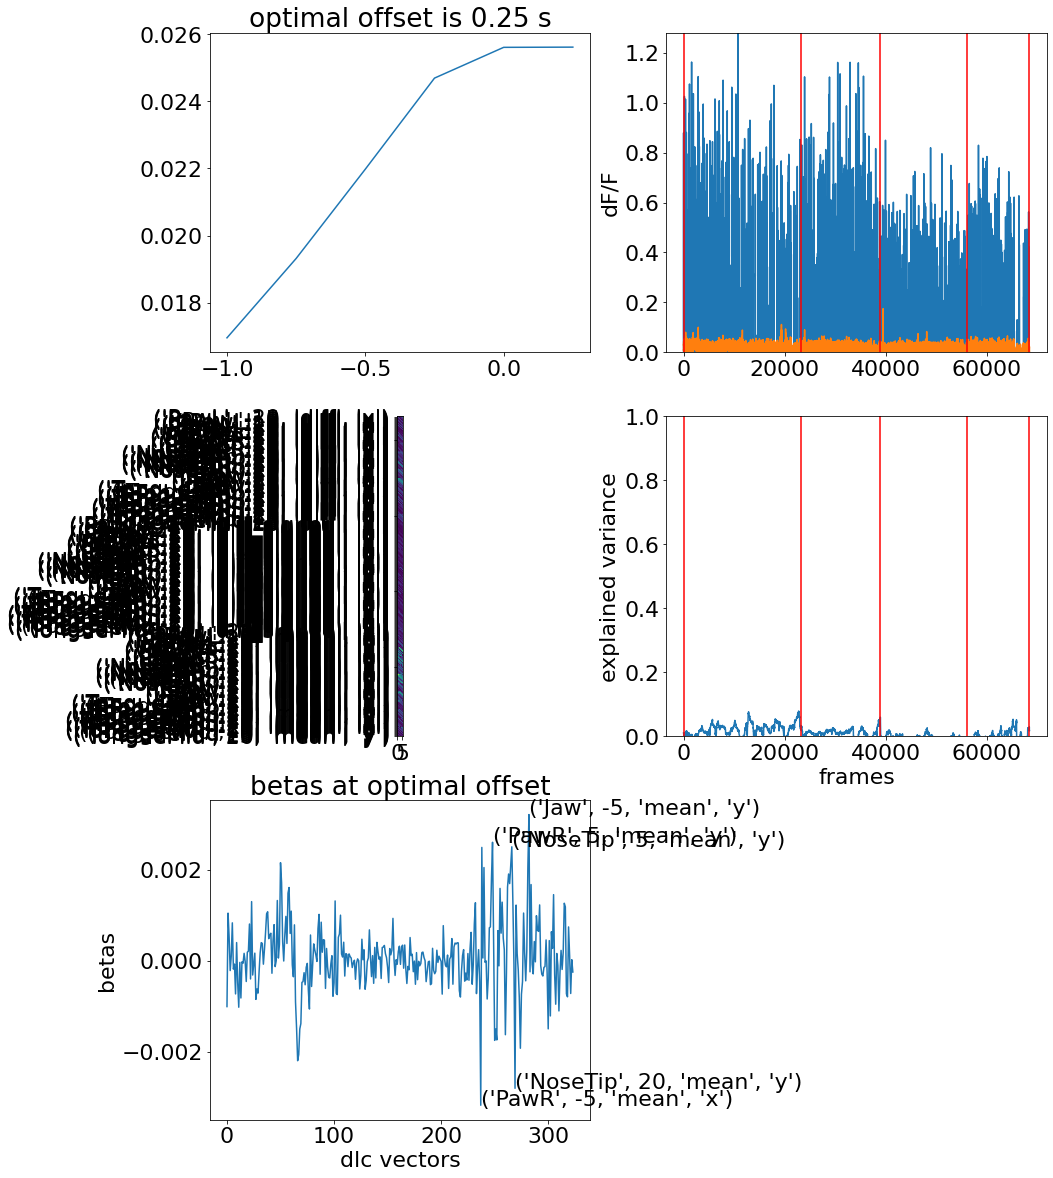

In [17]:
fig = plt.figure(figsize = [15,20])
ax1= fig.add_subplot(3,2,1)
ax2= fig.add_subplot(3,2,3)
ax1.plot(offsets/20,score_list)
ax1.set_title('optimal offset is {} s'.format(offsets[np.argmax(score_list)]/20))
beta_array = np.abs(np.asarray(beta_list).squeeze().T)
# beta_array = beta_array - np.min(beta_array,1)[:,np.newaxis]
# beta_array = beta_array / np.max(beta_array,1)[:,np.newaxis]
ax2.imshow(beta_array)
# ticks =np.arange(0,33,5)
# ax2.set_xticks(ticks)
# ax2.set_xticklabels(offsets[ticks]/20)
# ax2.set_xticklabels(offsets[ticks]/20)
ax2.set_yticks(np.arange(0,len(DLC_aligned.keys()),1))
ax2.set_yticklabels(DLC_aligned.keys())
ax3 = fig.add_subplot(3,2,2)
    
ax3.plot(F[cn, :], label=f'neuron {cn} Flourescence Trace')
scores_, beta_, intercept_ = pipeline_regression.linear_regression(np.roll(F[cn:cn+1],offsets[np.argmax(score_list)],1), DLC_aligned)
scores_ = scores_[0]
beta_ = beta_[0]
intercept_ = intercept_[0]
ax3.plot((beta_@DLC_aligned.T.values) + intercept_, label='Fitted Data')
#ax3.set_xlim([0,10000])
ax3.set_ylim([np.min(F[cn, :]),np.max(F[cn, :])])
ax3.set_ylabel('dF/F')
ax3.vlines(np.cumsum(np.concatenate([[0],session_frame_nums])),ymin = ax3.get_ylim()[0],ymax = ax3.get_ylim()[1],color = 'red')
var_win = 1000
original_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :],var_win,'var')
predicted_variance =BCI_analysis.plot_utils.rollingfun((beta_@DLC_aligned.T.values) + intercept_,var_win,'var') 
residual_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :] - ((beta_@DLC_aligned.T.values) + intercept_),var_win,'var')
nonexplained_variance = np.abs(residual_variance)/original_variance

ax_diff = fig.add_subplot(3,2,4,sharex = ax3)
#ax_diff.plot((original_variance-residual_variance)/original_variance,'k-')
#ax_diff.plot(original_variance)
ax_diff.plot(1-nonexplained_variance)
ax_diff.set_ylim([0,1])
ax_diff.vlines(np.cumsum(np.concatenate([[0],session_frame_nums])),ymin = ax_diff.get_ylim()[0],ymax = ax_diff.get_ylim()[1],color = 'red')

ax_diff.set_xlabel('frames')
ax_diff.set_ylabel('explained variance')
#ax_diff.plot(residual_variance)
ax_beta_cn = fig.add_subplot(3,2,5)
ax_beta_cn.plot(beta_)
ax_beta_cn.set_xlabel('dlc vectors')
ax_beta_cn.set_ylabel('betas')
for i in np.argsort(np.abs(beta_))[::-1][:5]:
    ax_beta_cn.text(i,beta_[i],DLC_aligned.keys()[i])
ax_beta_cn.set_title('betas at optimal offset')

In [26]:
F_ctrl_.shape

(622, 12780)

In [ ]:
# Fit a CN on previous day's activity, then look at how the activity changes the next day

#create multi-session dlc-aligned
import scipy, random
zscore_fluorescence = False
session_frame_nums = []
create_lags = False
lags = np.arange(-20,25,5)

bootstrap = True
bootstrap_n = 50
bootstrap_ratio = .5
if not bootstrap:
    bootstrap_n = 1


movements_output_dict={'mean_movements_ctrl':[],
                      'mean_movements_test':[],
                      'var_movements_ctrl':[],
                      'var_movements_test':[],
                      'variance_explained_ctrl':[],
                       'variance_explained_test':[],}
#mouse_now = np.unique(multi_session_dict['mouse'])[1]
for mouse_now in np.unique(multi_session_dict['mouse']):
    needed_sessions = np.where(np.asarray(multi_session_dict['mouse']) == mouse_now)[0]
    for ctrl_session,test_session in zip(needed_sessions[:-1],needed_sessions[1:]):
        mean_movements_ctrl = []
        mean_movements_test = []
        var_movements_ctrl = []
        var_movements_test = []
        variance_explained_ctrl = []
        variance_explained_test = []
        for bootstrap_i in range(bootstrap_n):
            DLC_aligned_ctrl = multi_session_dict['DLC_aligned'][ctrl_session].copy()
            F_ctrl = multi_session_dict['F'][ctrl_session]
            DLC_aligned_test = multi_session_dict['DLC_aligned'][test_session].copy()
            F_test = multi_session_dict['F'][test_session]
            
            if bootstrap:
                trial_end_frames = np.asarray(multi_session_dict['trial_end_frames'][ctrl_session])
                trial_start_frames = np.concatenate([[0],trial_end_frames[:-1]])
                trial_indices = np.arange(len(trial_end_frames))
                trial_indices = np.sort(random.choices(trial_indices, k=int(len(trial_indices)*bootstrap_ratio)))
                trial_start_frames = trial_start_frames[trial_indices]
                trial_end_frames = trial_end_frames[trial_indices]
                DLC_aligned_ctrl_ = None
                F_ctrl_ = []
                for trial_start,trial_end in zip(trial_start_frames,trial_end_frames):
                    DLC_aligned_ctrl_ = pd.concat([DLC_aligned_ctrl_,DLC_aligned_ctrl[trial_start:trial_end]], ignore_index=True)
                    if len(F_ctrl_) == 0:
                        F_ctrl_ = F_ctrl[:,trial_start:trial_end]
                    else:
                        F_ctrl_ = np.concatenate([F_ctrl_,F_ctrl[:,trial_start:trial_end]],1)
                F_ctrl = F_ctrl_
                DLC_aligned_ctrl = DLC_aligned_ctrl_
                

            ctrl_frame_num = F_ctrl.shape[1]
            if zscore_fluorescence:
                F_ctrl = scipy.stats.zscore(F_ctrl,axis = 1)
                F_test = scipy.stats.zscore(F_test,axis = 1)
            for k in DLC_aligned_ctrl.keys():
                if 'mean' in k:# subtract mean from the raw position from day to day
                    DLC_aligned_ctrl[k] = DLC_aligned_ctrl[k] - np.nanmean(DLC_aligned_ctrl[k])
                    DLC_aligned_test[k] = DLC_aligned_test[k] - np.nanmean(DLC_aligned_test[k])
            DLC_aligned = pd.concat([DLC_aligned_ctrl, DLC_aligned_test], ignore_index=True)
            F = np.concatenate([F_ctrl,F_test],1)
            print(DLC_aligned.shape)
            #break


            for k in DLC_aligned.keys(): # remove eye and likelihood
                if 'likelihood'in k or 'eye' in k[0].lower() or 'pole' in k[0].lower():
                    DLC_aligned.pop(k)
                    DLC_aligned_ctrl.pop(k)
                    DLC_aligned_test.pop(k)
            for k in DLC_aligned.keys(): # remove lickport
                if 'lickport' in k[0].lower() or 'pole' in k[0].lower() or 'mean' in k: #remove mean as well
                    DLC_aligned.pop(k)
                    DLC_aligned_ctrl.pop(k)
                    DLC_aligned_test.pop(k)
            for k in DLC_aligned.keys(): # normalize data
                DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].mean())/DLC_aligned[k].std()
                DLC_aligned_ctrl[k] = (DLC_aligned_ctrl[k] - DLC_aligned[k].mean())/DLC_aligned[k].std()
                DLC_aligned_test[k] = (DLC_aligned_test[k] - DLC_aligned[k].mean())/DLC_aligned[k].std()
                #DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].quantile(.05))/(DLC_aligned[k].quantile(.95)-DLC_aligned[k].quantile(.05))


            #create offsets - 1 second back and forward
            if create_lags:

                cols_new = []
                for col in DLC_aligned.columns:
                    for offset in lags:
                        cols_new.append((col[0],offset,col[1],col[2]))
                df2 = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)
                df2_ctrl = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)
                df2_test = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)

                for k in df2.keys():
                    df2[k] = pd.Series(np.roll(DLC_aligned[k[0],k[2],k[3]],k[1]))
                    df2_ctrl[k] = pd.Series(np.roll(DLC_aligned_ctrl[k[0],k[2],k[3]],k[1]))
                    df2_test[k] = pd.Series(np.roll(DLC_aligned_test[k[0],k[2],k[3]],k[1]))
                DLC_aligned = df2    
                DLC_aligned_ctrl = df2_ctrl 
                DLC_aligned_test = df2_test


            cn = multi_session_dict['cn'][test_session]
            scores_, beta_, intercept_ = pipeline_regression.linear_regression(F_ctrl[cn:cn+1], DLC_aligned_ctrl)
            #scores_, beta_, intercept_ = pipeline_regression.ridge_regression(F_ctrl[cn:cn+1], DLC_aligned_ctrl)
            scores_ = scores_[0]
            beta_ = beta_[0]
            intercept_ = intercept_[0]

            var_win = 1000
            original_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :],var_win,'var')
            predicted_variance =BCI_analysis.plot_utils.rollingfun((beta_@DLC_aligned.T.values) + intercept_,var_win,'var') 
            residual_variance = BCI_analysis.plot_utils.rollingfun(F[cn, :] - ((beta_@DLC_aligned.T.values) + intercept_),var_win,'var')
            nonexplained_variance = residual_variance/original_variance
            explained_variance = 1-nonexplained_variance


            orig_var_ctrl = np.nanvar(F_ctrl[cn,:])
            residual_var_ctrl = np.nanvar(F_ctrl[cn,:] - ((beta_@DLC_aligned_ctrl.T.values) + intercept_))
            explained_variance_ctrl = 1- residual_var_ctrl/orig_var_ctrl

            orig_var_test = np.nanvar(F_test[cn,:])
            residual_var_test = np.nanvar(F_test[cn,:] - ((beta_@DLC_aligned_test.T.values) + intercept_))
            explained_variance_test = 1- residual_var_test/orig_var_test

            fig = plt.figure(figsize = [20,15])
            ax_ctrl_trace = fig.add_subplot(3,2,1)
            ax_ctrl_trace.plot(F_ctrl[cn, :], label=f'neuron {cn} Flourescence Trace')
            ax_ctrl_trace.plot((beta_@DLC_aligned_ctrl.T.values) + intercept_, label='Fitted Data')
            ax_ctrl_trace.set_title('{} - {} - neuron {}'.format(mouse_now, multi_session_dict['session'][ctrl_session],cn))

            ax_ctrl_var_explained = fig.add_subplot(3,2,3)
            ax_ctrl_var_explained.plot(explained_variance[:ctrl_frame_num])
            ax_ctrl_var_explained.set_ylabel('Normalized variance explained')


            ax_test_trace = fig.add_subplot(3,2,2)
            ax_test_trace.plot(F_test[cn, :], label=f'neuron {cn} Flourescence Trace')
            ax_test_trace.plot((beta_@DLC_aligned_test.T.values) + intercept_, label='Fitted Data')
            ax_test_trace.set_title('{} - {} - neuron {}'.format(mouse_now, multi_session_dict['session'][test_session],cn))


            ax_test_var_explained = fig.add_subplot(3,2,4,sharey = ax_ctrl_var_explained)
            ax_test_var_explained.plot(explained_variance[ctrl_frame_num:])

            ax_ctrl_movements = fig.add_subplot(3,2,5)
            movements_ctrl = (beta_@DLC_aligned_ctrl.T.values)
            ax_ctrl_movements.plot(movements_ctrl)
            ax_ctrl_movements.set_ylabel('betas@movements')
            ax_ctrl_movements.set_xlabel('Frames')

            ax_test_movements = fig.add_subplot(3,2,6,sharey = ax_ctrl_movements)
            movements_test = (beta_@DLC_aligned_test.T.values)
            ax_test_movements.plot(movements_test)
            ax_test_movements.set_xlabel('Frames')
            
            
            mean_movements_ctrl.append(np.nanmean(movements_ctrl))
            mean_movements_test.append(np.nanmean(movements_test))
            var_movements_ctrl.append(np.nanvar(movements_ctrl))
            var_movements_test.append(np.nanvar(movements_test))
            variance_explained_ctrl.append(explained_variance_ctrl)
            variance_explained_test.append(explained_variance_test)
        movements_output_dict['mean_movements_ctrl'].append(mean_movements_ctrl)
        movements_output_dict['mean_movements_test'].append(mean_movements_test)
        movements_output_dict['var_movements_ctrl'].append(var_movements_test)
        movements_output_dict['var_movements_test'].append(var_movements_test)
        movements_output_dict['variance_explained_ctrl'].append(variance_explained_ctrl)
        movements_output_dict['variance_explained_test'].append(variance_explained_test)

    #break


(34847, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 87.44it/s]


(34941, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.33it/s]


(35553, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.39it/s]


(34857, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.62it/s]


(35149, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.08it/s]


(35611, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.05it/s]


(34789, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.71it/s]


(34918, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.46it/s]


(34561, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.37it/s]


(35022, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.98it/s]


(35687, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.67it/s]


(34904, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.37it/s]


(35084, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.00it/s]


(34624, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.96it/s]


(35088, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.52it/s]


(34720, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.26it/s]


(36171, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 57.38it/s]


(34617, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.33it/s]


(35753, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.45it/s]


(34563, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 63.09it/s]


(34193, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 64.14it/s]
/tmp/ipykernel_24830/4191559391.py:132: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = [20,15])


(34754, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.46it/s]


(35902, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.26it/s]


(35257, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.20it/s]


(34804, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 61.44it/s]


(34515, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 62.24it/s]


(35426, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 59.37it/s]


(35451, 108)
Calculating regression fit for 1 neurons, May take time


100%|██████████| 1/1 [00:00<00:00, 60.98it/s]


(-0.5, 1.5)

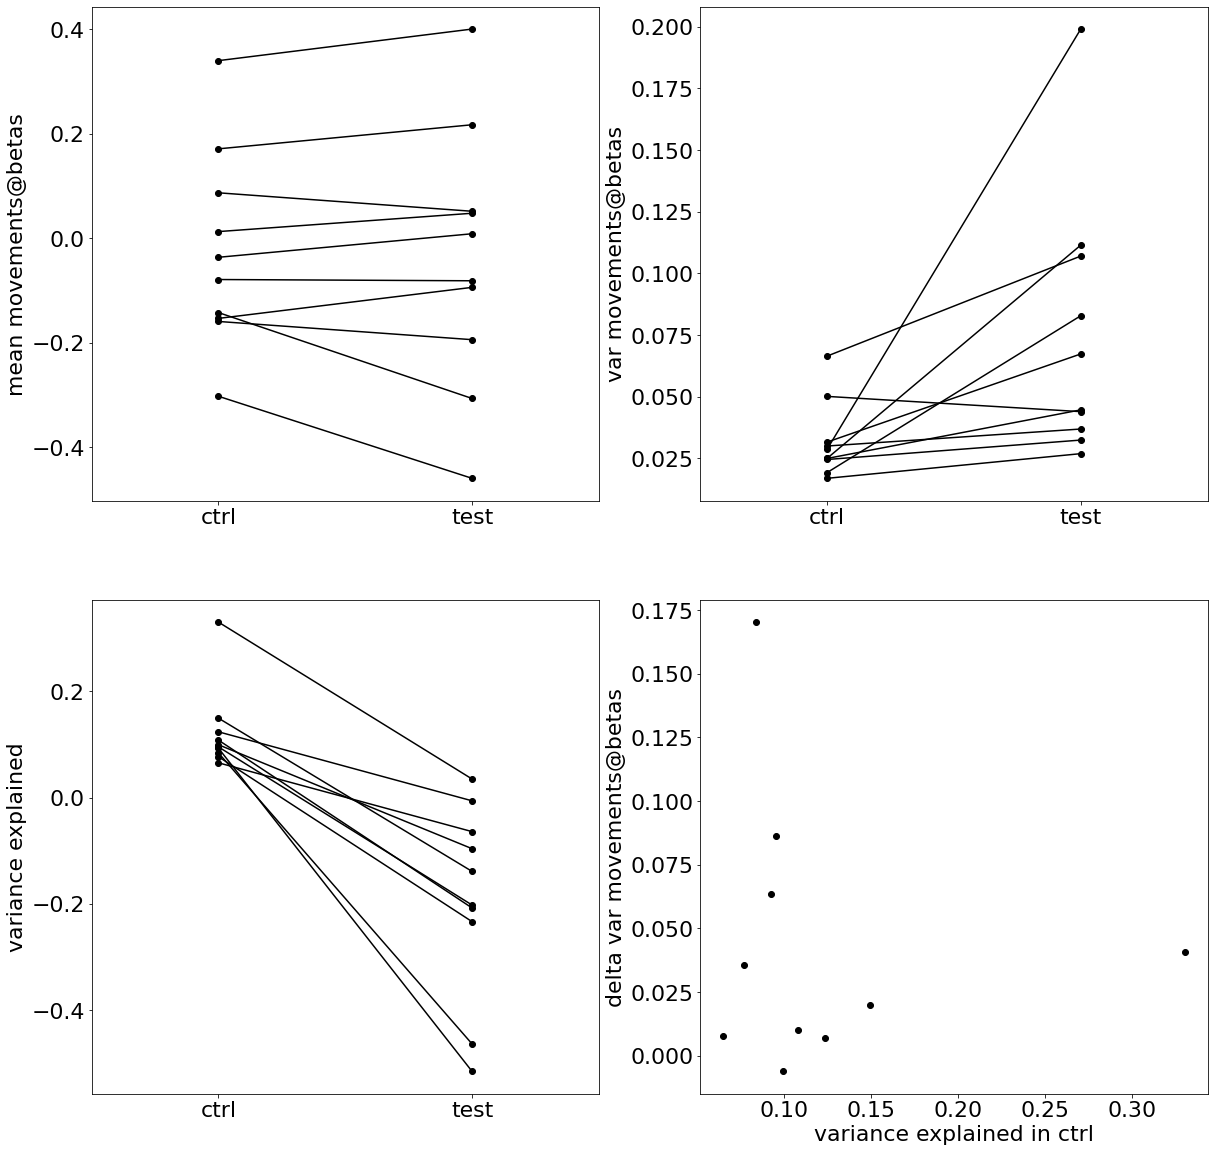

In [126]:
fig = plt.figure(figsize = [20,20])
ax1 = fig.add_subplot(2,2,1)
ax1.set_ylabel('mean movements@betas')
ax2 = fig.add_subplot(2,2,2)
ax2.set_ylabel('var movements@betas')
ax3 = fig.add_subplot(2,2,4)
ax4 = fig.add_subplot(2,2,3)

for mean1,mean2 in zip(movements_output_dict['mean_movements_ctrl'],movements_output_dict['mean_movements_test']):
    ax1.plot([0,1],[mean1,mean2],'ko-')
var_diff = []
for var1,var2 in zip(movements_output_dict['var_movements_ctrl'],movements_output_dict['var_movements_test']):
    ax2.plot([0,1],[var1,var2],'ko-')
    var_diff.append(var2-var1)
    
for varexp1,varexp2 in zip(movements_output_dict['variance_explained_ctrl'],movements_output_dict['variance_explained_test']):
    ax4.plot([0,1],[varexp1,varexp2],'ko-')
ax4.set_ylabel('variance explained')

ax3.plot(movements_output_dict['variance_explained_ctrl'],var_diff,'ko')
ax3.set_xlabel('variance explained in ctrl')
ax3.set_ylabel('delta var movements@betas')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['ctrl','test'])
ax1.set_xlim([-.5,1.5])
ax2.set_xticks([0,1])
ax2.set_xticklabels(['ctrl','test'])
ax2.set_xlim([-.5,1.5])
ax4.set_xticks([0,1])
ax4.set_xticklabels(['ctrl','test'])
ax4.set_xlim([-.5,1.5])
#ax1.plot(np.concatenate([np.ones_like(movements_output_dict['mean_movements_ctrl']),np.ones_like(movements_output_dict['mean_movements_test'])*2]),np.concatenate([movements_output_dict['mean_movements_ctrl'],movements_output_dict['mean_movements_test']]),'ko')

Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00,  8.96it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00,  9.81it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00, 10.10it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00,  9.74it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00, 14.94it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00, 13.56it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00, 15.34it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00,  7.26it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00, 13.78it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00,  9.39it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00, 16.58it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00,  9.77it/s]


Calculating regression fit for 2 neurons, May take time


100%|██████████| 2/2 [00:00<00:00, 10.64it/s]


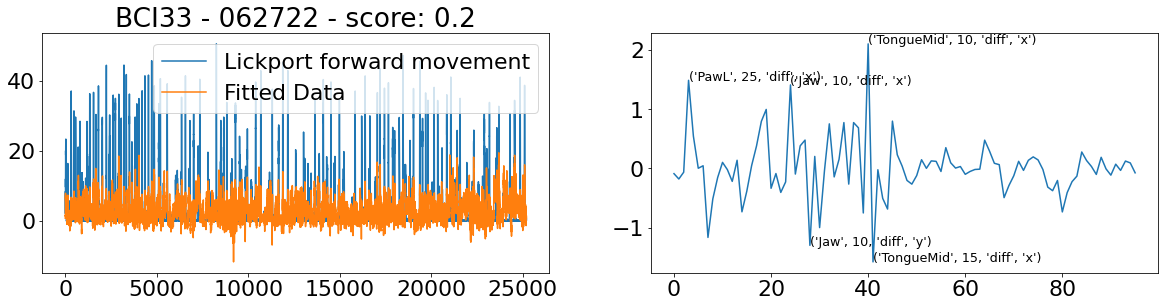

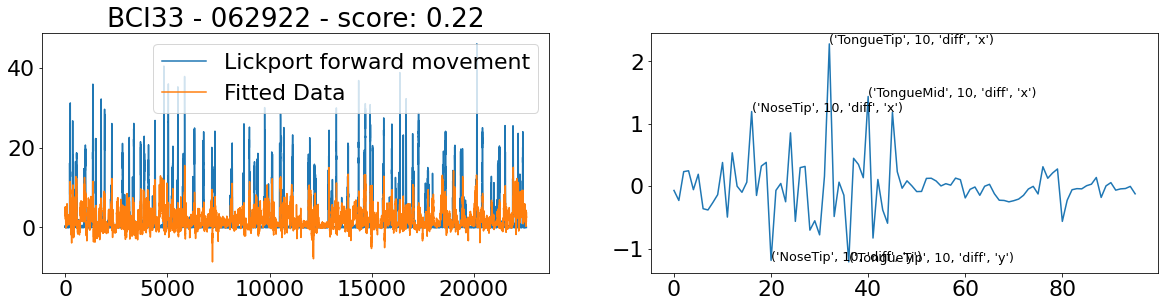

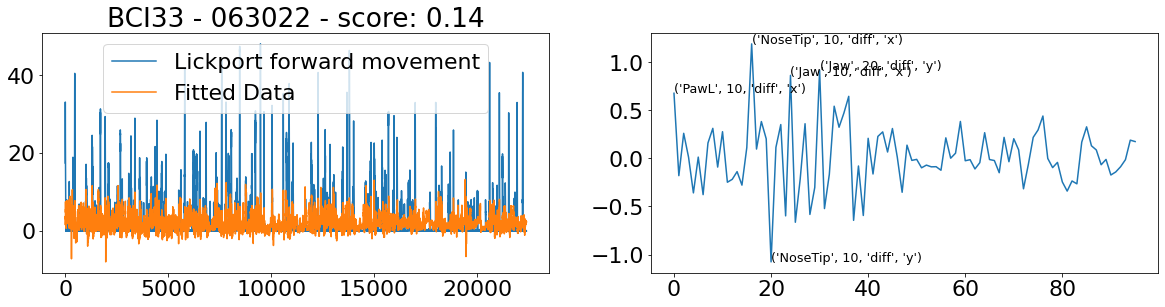

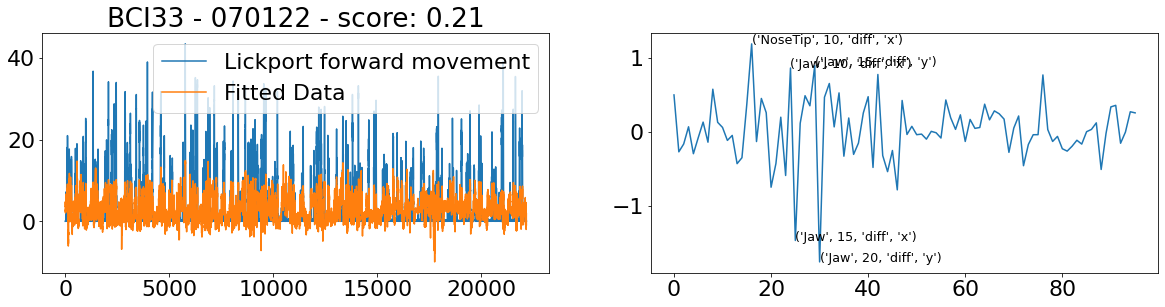

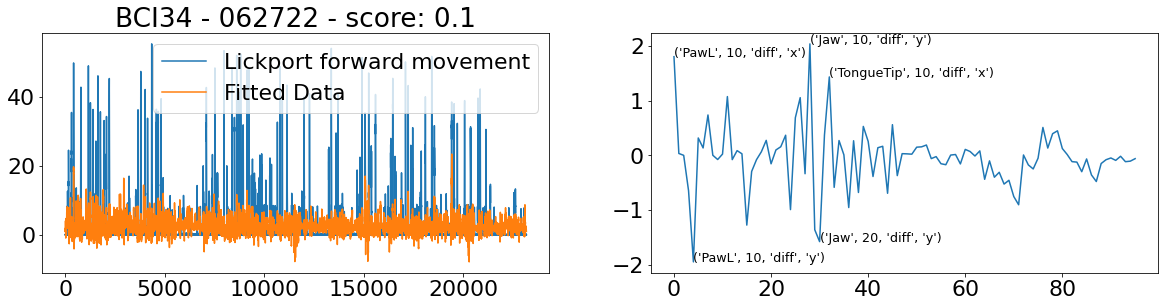

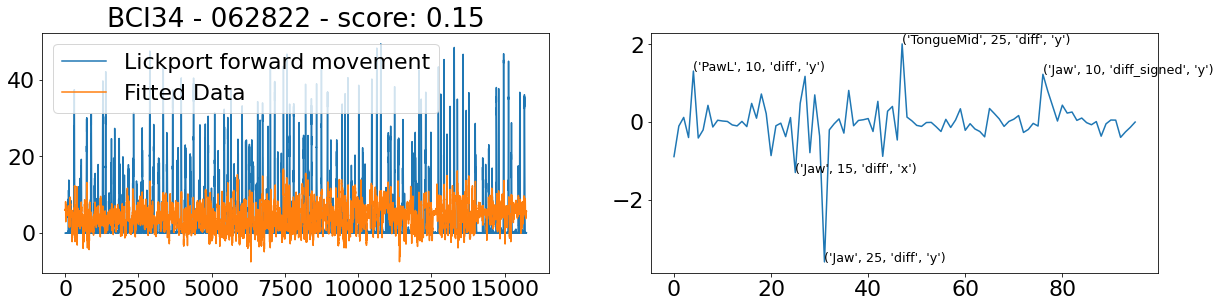

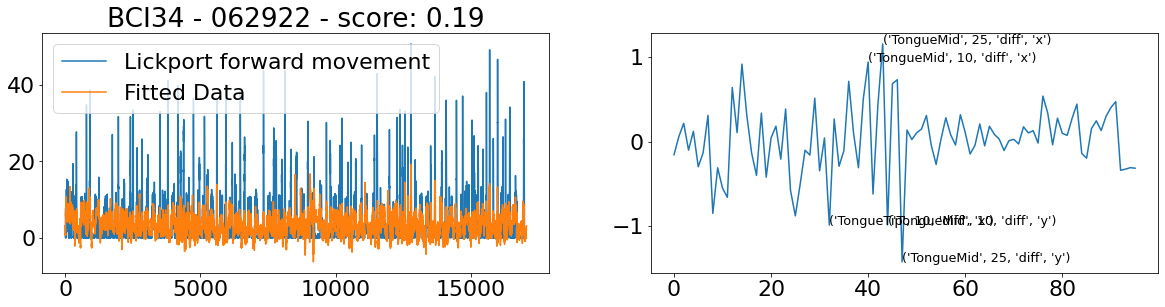

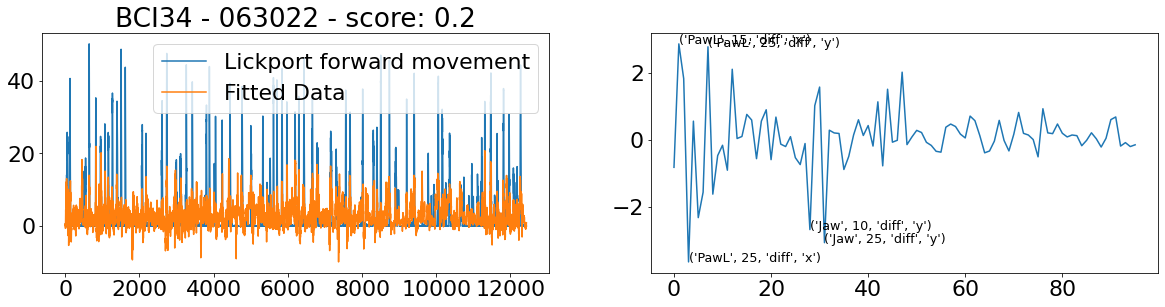

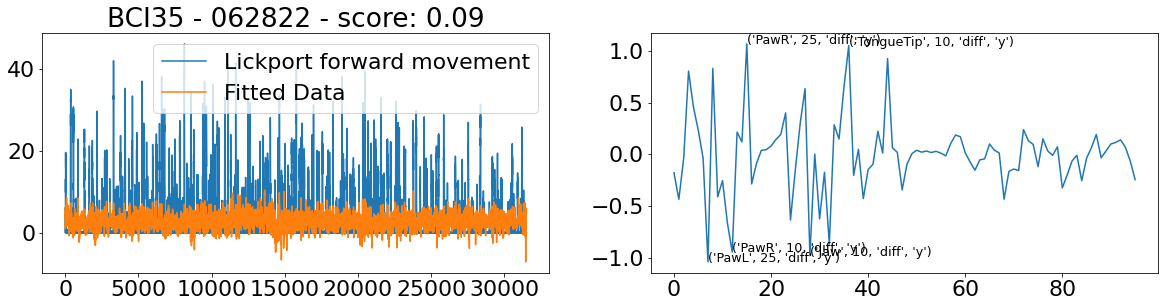

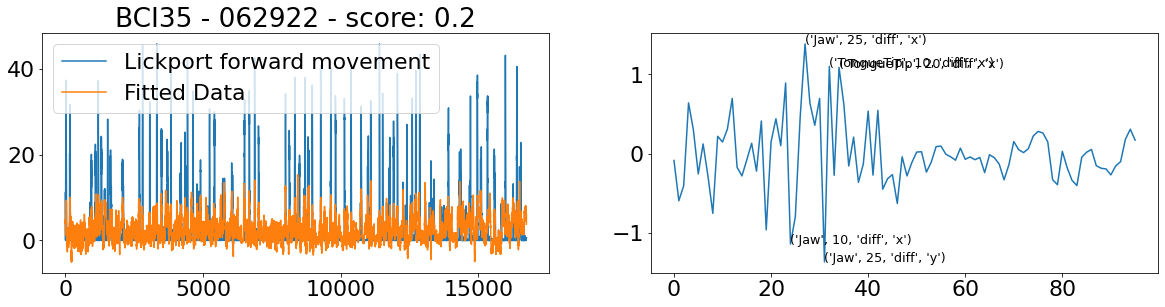

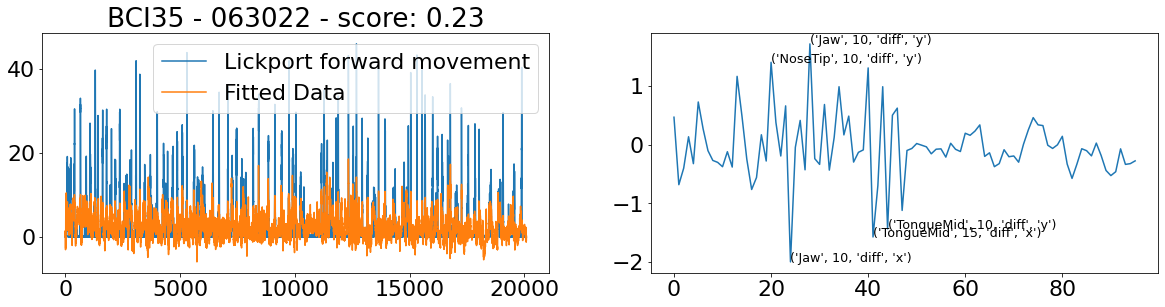

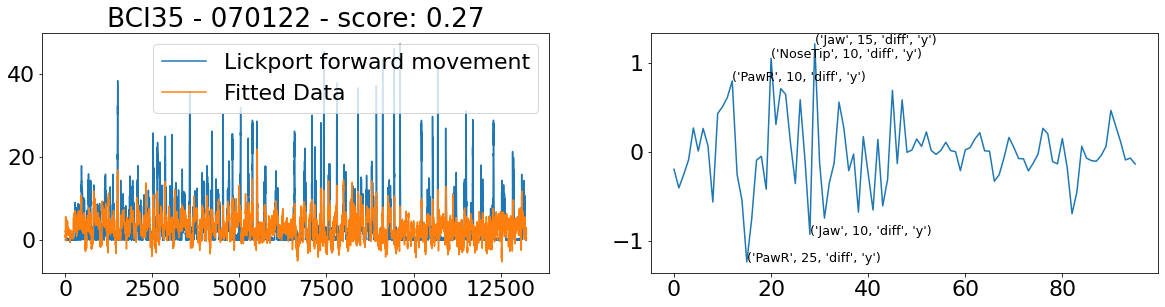

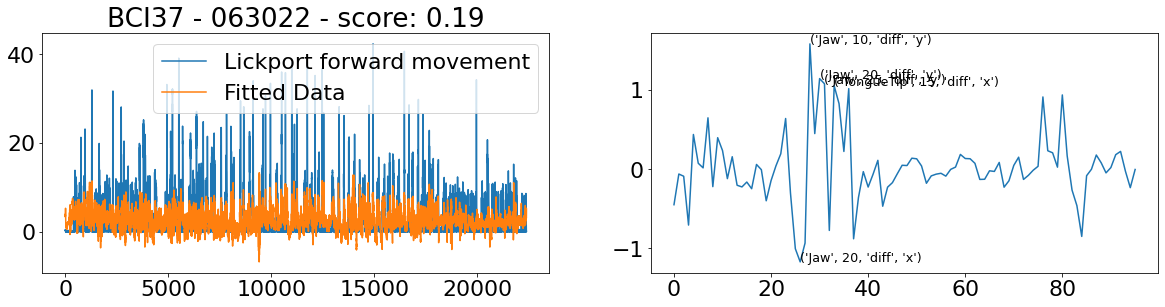

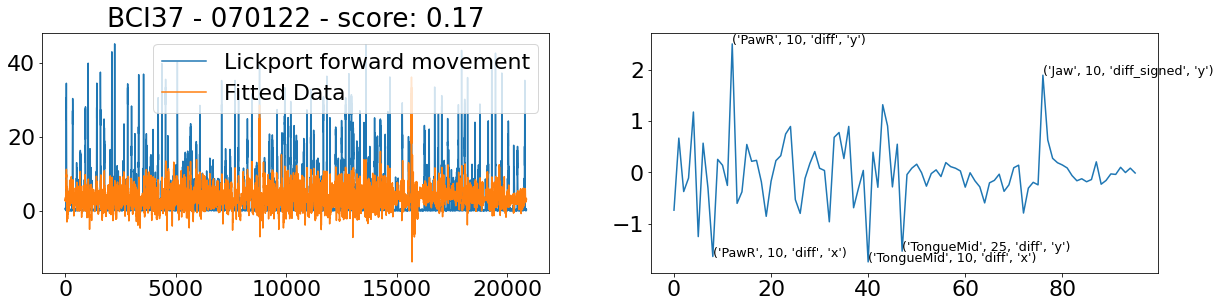

In [181]:
# can we predict lickport movements with behavior??
create_lags = True
for needed_session in range(len(multi_session_dict['DLC_aligned'])):

    DLC_aligned= multi_session_dict['DLC_aligned'][needed_session].copy()

    for k in DLC_aligned.keys():
        if 'mean' in k:# subtract mean from the raw position from day to day
            DLC_aligned[k] = DLC_aligned[k] - np.nanmean(DLC_aligned[k])
    lickport_movement = DLC_aligned['Lickport']['diff_signed']['x'].values    
    lickport_movement[lickport_movement<0] = 0

    for k in DLC_aligned.keys(): # normalize data
        DLC_aligned[k] = (DLC_aligned[k] - DLC_aligned[k].mean())/DLC_aligned[k].std()

    for k in DLC_aligned.keys(): # remove eye and likelihood
        if 'likelihood'in k or 'eye' in k[0].lower() or 'pole' in k[0].lower():
            DLC_aligned.pop(k)
    for k in DLC_aligned.keys(): # remove lickport
        if 'lickport' in k[0].lower() or 'pole' in k[0].lower() or 'mean' in k: #remove mean as well
            DLC_aligned.pop(k)


    #create offsets - 1 second back and forward
    if create_lags:
        offsets = np.arange(10,30,5)
        cols_new = []
        for col in DLC_aligned.columns:
            for offset in offsets:
                cols_new.append((col[0],offset,col[1],col[2]))
        df2 = pd.DataFrame(0, index=range(0), columns=cols_new)#dlc_data.columns)

        for k in df2.keys():
            df2[k] = pd.Series(np.roll(DLC_aligned[k[0],k[2],k[3]],k[1]))
        DLC_aligned = df2    



    scores_, beta_, intercept_ = pipeline_regression.linear_regression(np.asarray([lickport_movement,lickport_movement]), DLC_aligned)
    #scores_, beta_, intercept_ = pipeline_regression.ridge_regression(F_ctrl[cn:cn+1], DLC_aligned_ctrl)
    scores_ = scores_[0]
    beta_ = beta_[0]
    intercept_ = intercept_[0]
    fig = plt.figure(figsize = [20,15])
    ax_trace = fig.add_subplot(3,2,1)
    ax_trace.plot(lickport_movement, label=f'Lickport forward movement')
    ax_trace.plot((beta_@DLC_aligned.T.values) + intercept_, label='Fitted Data')
    #ax_trace.set_xlim([0,5000])
    ax_trace.set_title('{} - {} - score: {}'.format(multi_session_dict['mouse'][needed_session], multi_session_dict['session'][needed_session],np.round(scores_,2)))

    ax_trace.legend()

    ax_coef = fig.add_subplot(3,2,2)
    ax_coef.plot(beta_)
    for i in np.argsort(np.abs(beta_))[::-1][:5]:
        ax_coef.text(i,beta_[i],DLC_aligned.keys()[i],fontsize = 'xx-small')

2.9829148610052316

In [ ]:
# Matt Bull's dimensionality estimation
from sklearn.decomposition import PCA
import matplotlib.cm as cm

windowsize = 2000
windowstep = 400
PCAcomponents = 100

fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2,sharex = ax)
sessionstostudy = multi_session_dict['mat_idx']#np.where(np.array(multi_session_behavior_data['session']).ravel() != None)[0]
cmap = cm.jet(np.linspace(0,1,len(sessionstostudy)))
sessionct=0
traces_calcium =[]
t_ = []
traces_movement = []
for ii,session in enumerate(sessionstostudy):
    neuron = multi_session_behavior_data['conditioned_neuron'][session]
    #df = multi_session_behavior_data['df_closedLoop'][session]
    df = multi_session_dict['F'][ii].T
    dlc = multi_session_dict['DLC_aligned'][ii]
    numwindow = int((df.shape[0]-windowsize)/windowstep)
    dimovertime = np.zeros([numwindow,1])
    dimovertime_dlc = np.zeros([numwindow,1])
    if np.min(df[0:windowsize].shape) > PCAcomponents:
        pca = PCA(n_components=PCAcomponents, svd_solver='full')
        for i in range(numwindow):
            pca.fit(df[i*windowstep:i*windowstep+windowsize,:])
            dimovertime[i] = np.sum(pca.explained_variance_)**2/(np.sum(pca.explained_variance_**2))
            
            pca.fit(dlc[i*windowstep:i*windowstep+windowsize])
            dimovertime_dlc[i] = np.sum(pca.explained_variance_)**2/(np.sum(pca.explained_variance_**2))

        ax.plot(np.arange(numwindow)*windowstep, dimovertime.ravel(),'.-', color=cmap[sessionct,:], lw = 2, label='session = ' + str(session))
        ax2.plot(np.arange(numwindow)*windowstep, dimovertime_dlc.ravel(),'.--', color=cmap[sessionct,:], lw = 2, label='session_dlc = ' + str(session))
        traces_calcium.append(dimovertime.ravel())
        traces_movement.append(dimovertime_dlc.ravel())
    sessionct += 1

l_ = []
for t in traces_calcium:
    l_.append(len(t))
l_ = np.min(l_)
dim_ca_matrix = np.zeros([len(traces_calcium),l_])
dim_dlc_matrix = np.zeros([len(traces_calcium),l_])
for i,(c,m) in enumerate(zip(traces_calcium,traces_movement)):
    dim_ca_matrix[i,:] = c[:l_]
    dim_dlc_matrix[i,:] = m[:l_]
ax.plot(np.arange(l_)*windowstep,np.mean(dim_ca_matrix,0),'k.-',linewidth = 4)    
ax2.plot(np.arange(l_)*windowstep,np.mean(dim_dlc_matrix,0),'k.--',linewidth = 4)    
   
    
ax.set_ylabel('Effective Dimensionality (calcium)')
ax2.set_ylabel('Effective Dimensionality (movements)')
plt.xlabel('Time')
ax.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.show()



In [27]:
# save DLC data and calcium traces to fit the neural network in FaceMap
import h5py
def save_dict_to_hdf5(h5file, path, data_dict):
    """
    Saves dictionary to an HDF5 file. Adapted from https://github.com/talmolab/sleap/blob/391bc0421fe3820ddd6b5d07e31311d60b129fe3/sleap/util.py#L116
    Calls itself recursively if items in dictionary are not
    `np.ndarray`, `np.int64`, `np.float64`, `str`, or bytes.
    Objects must be iterable.
    Args:
        h5file: The HDF5 filename object to save the data to.
            Assume it is open.
        path: The path to group save the dict under.
        data_dict: The dict containing data to save.
    Raises:
        ValueError: If type for item in dict cannot be saved.
    Returns:
        None
    """
    for key, item in list(data_dict.items()):
        if item is None:
            h5file[path + key] = ""
        elif isinstance(item, bool):
            h5file[path + key] = int(item)
        elif isinstance(item, list):
            items_encoded = []
            for it in item:
                if isinstance(it, str):
                    items_encoded.append(it.encode("utf8"))
                else:
                    items_encoded.append(it)

            h5file[path + key] = np.asarray(items_encoded)
        elif isinstance(item, (str)):
            h5file[path + key] = item.encode("utf8")
        elif isinstance(
            item, (np.ndarray, np.int64, np.float64, str, bytes, float)
        ):
            h5file[path + key] = item
        elif isinstance(item, dict):
            save_dict_to_hdf5(h5file, path + key + "/", item)
        elif isinstance(item, int):
            h5file[path + key] = item
        else:
            raise ValueError("Cannot save %s type" % type(item))
            
            
facemap_keys = ['eye(back)',
                 'eye(bottom)',
                 'eye(front)',
                 'eye(top)',
                 'lowerlip',
                 'mouth',
                 'nose(bottom)',
                 'nose(r)',
                 'nose(tip)',
                 'nose(top)',
                 'nosebridge',
                 'paw',
                 'whisker(I)',
                 'whisker(II)',
                 'whisker(III)']
dict_out = {}
for k in facemap_keys:
    dict_out[k] = {}
dlc_keys = []
dlc_keys_rest = []
for k in DLC_aligned.keys():
    if 'mean' in k:
        dlc_keys.append(k)
    else:
        dlc_keys_rest.append(k)
dlc_keys.extend(dlc_keys_rest)
for i,k in enumerate(dlc_keys):
    idx = int((i-i%3)/3)
    if idx==len(facemap_keys):
        print(k)
        break
    if 'likelihood' in k:
        dict_out[facemap_keys[idx]][k[-1]] = np.ones_like(DLC_aligned[k].values)
    else:
        dict_out[facemap_keys[idx]][k[-1]] = DLC_aligned[k].values
dict_out = {'Facemap':dict_out}           
     
    
with h5py.File("/home/jupyter/bucket/test_movements.h5", "w") as f:
    save_dict_to_hdf5(f, "", dict_out)
np.save("/home/jupyter/bucket/test_neurons.npy",F)
np.save("/home/jupyter/bucket/timestamps.npy",np.arange(F.shape[1]))

from sklearn.decomposition import PCA
PCAcomponents = 300
pca = PCA(n_components=PCAcomponents, svd_solver='full')
pca.fit(F)
np.save("/home/jupyter/bucket/test_neurons_pca.npy",pca.components_)

('NoseTip', -20, 'mean', 'y')


(-5.0, 5.0)

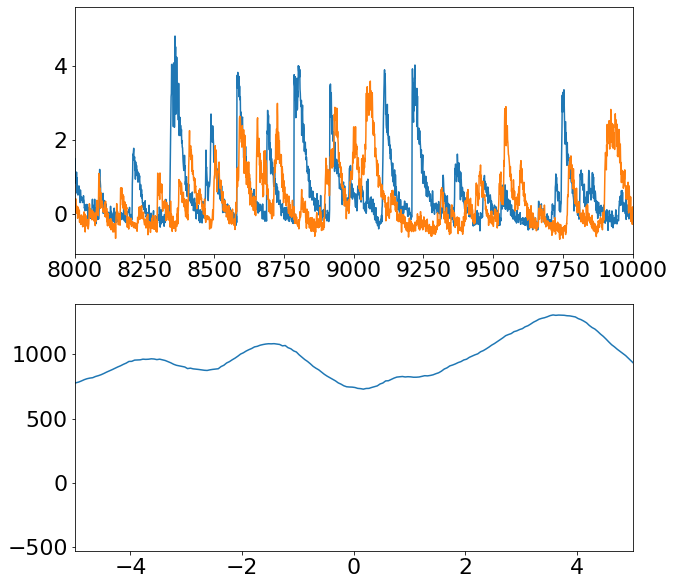

In [36]:
fig = plt.figure(figsize = [10,10])
ax = fig.add_subplot(2,1,1)
ax.plot(F[1,:])
ax.plot(F[3,:])
ax.set_xlim([8000,10000])
import scipy
cc = scipy.signal.correlate(F[1,10000:15000], F[3,10000:15000], mode='full', method='auto')
ax2 = fig.add_subplot(2,1,2)
ax2.plot((np.arange(len(cc))-len(cc)/2)/20,cc)
ax2.set_xlim([-5,5])

In [16]:
# select neurons to predict based on their activity - e.g. exclude cells that have low activity, or include cells that have bit movement-triggered averages, and whatnot - Marton can do this

In [150]:
# predict the activity of the selected neurons from DLC data

## FaceMap model

In [1]:
from facemap.neural_prediction import prediction_utils #neural_activity

# Comparison of day-to-day movements

In [184]:
# extract reward-triggered and go-cue triggered movements of a mouse for ALL sessions
import os
import importlib
importlib.reload(BCI_analysis.pipeline_align)
dlc_base_dir = os.path.abspath("../bucket/Data/Behavior_videos/DLC_output/Bergamo-2P-Photostim/")
bpod_path = os.path.abspath("../bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/")
suite2p_path = os.path.abspath("../bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/")
sessionwise_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/sessionwise_tba/")
aligned_data_path = os.path.abspath("../bucket/Data/Calcium_imaging/data_aligned/")
plt_save_path = os.path.abspath("../Plots/")

mouse = "BCI_26"
FOV = "FOV_04"
camera = "side"
session = "041022"
dict_aligned = BCI_analysis.pipeline_align.get_aligned_data(suite2p_path, dlc_base_dir, bpod_path, 
                                                            sessionwise_data_path, aligned_data_path, 
                                                            mouse=mouse, FOV=FOV, camera=camera, 
                                                            session=session, sampling='down', overwrite=False)

# function1: dict_aligned should also have the moving standard deviation and then downsample it. (Paint)
#            Also make sure to have the flouroscence indices.        
# function2: align at some point

File found at /home/jupyter/BCI_analysis/bucket/Data/Calcium_imaging/data_aligned/BCI_26/041022-dict_aligned-downsampled.npy


dict_keys(['F_aligned', 'DLC_aligned', 'dff_aligned', 'lick_times_aligned', 'reward_times_aligned', 'trial_times_aligned', 'cn', 'trials_taken'])


Calculating regression fit for 887 neurons, May take time


100%|██████████| 887/887 [00:20<00:00, 43.11it/s]


In [ ]:
# train a classifier to predict the session ID based on the movements. Can we do it?

# classify single trials with many parameters, if we look at single movements its easier to do it. 
## to focus on sessions that the mouse mightve learnt with movements. 

# look at behavior after the reward vs before the reward. 
# look at trial to trial data. 

#
#
#      Speed (root(vx^2 + vy^2))
#     (moving standard devations)  ----> Random Forest ----> 
#         ------reward------
#
#

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = DLC_aligned
y = data['session ID']

clf = RandomForestClassifier()

# Fit the classifier to the data
clf.fit(X, y)
predictions = clf.predict(X)
print(predictions)

